In [1]:
import os
import numpy as np

from src.PorfolioOptimizerSA import PortfolioOptimizerSA
from src.generate_scenarios import generate_scenarios_historical_data
from src.analysis import (
    plot_cvar_history,
    return_rate_influence,
    plot_return_rate_influence,
    plot_weights
)

In [2]:
PATHS_TO_STOCK_DATA = [f"stock_data/{name}" for name in os.listdir("stock_data")]
N_SCENARIOS = 1000
PERIOD_IN_DAYS = 30
INITIAL_PRICE = 100

In [3]:
scenarios = generate_scenarios_historical_data(PATHS_TO_STOCK_DATA, N_SCENARIOS, PERIOD_IN_DAYS, INITIAL_PRICE)

In [4]:
S_0 = np.array([100, 100, 100])
probabilities = 1 / np.arange(1, scenarios.shape[0] + 1)
probabilities /= probabilities.sum()
probabilities_uniform = np.ones(scenarios.shape[0]) / scenarios.shape[0]
alpha = 0.95
V_0 = 10000
return_rate = 0.05
T_0 = 1000
T_f = 0.00001
max_iter = 1000
step_size = 1
annealing_rate = 0.99

Ścieżka 1: Końcowe CVaR/V0 = 0.0768
Ścieżka 2: Końcowe CVaR/V0 = 0.0768
Ścieżka 3: Końcowe CVaR/V0 = 0.0768
Ścieżka 4: Końcowe CVaR/V0 = 0.0768
Ścieżka 5: Końcowe CVaR/V0 = 0.0768
Ścieżka 6: Końcowe CVaR/V0 = 0.0768
Ścieżka 7: Końcowe CVaR/V0 = 0.0768


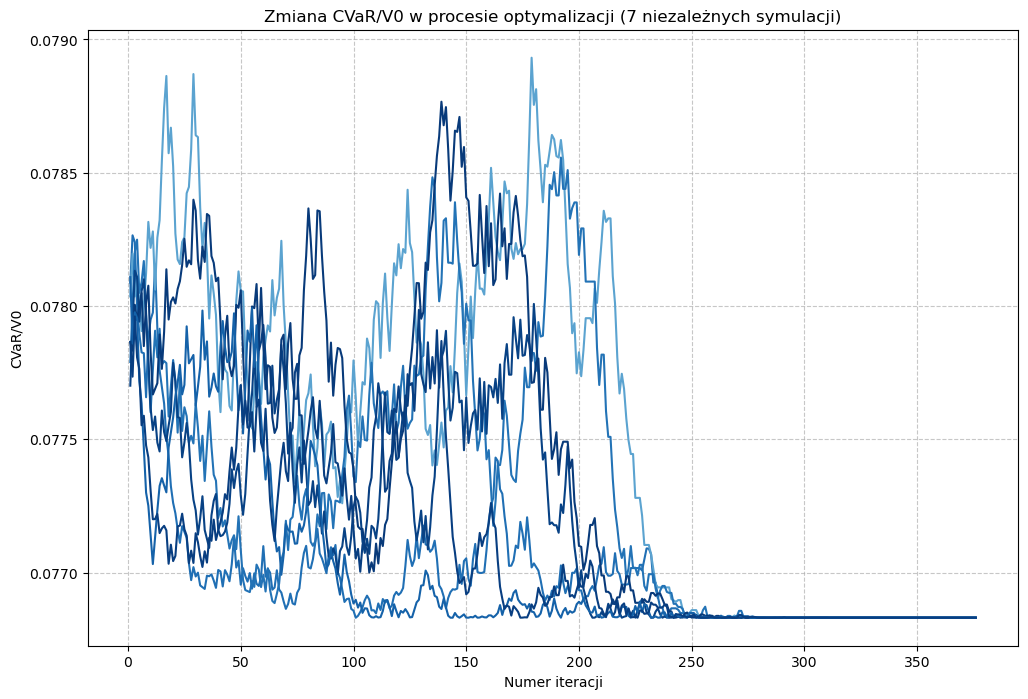

In [5]:
plot_cvar_history(T_0 = T_0,
                  T_f = T_f,
                  max_iter = max_iter,
                  step_size = step_size,
                  annealing_rate = annealing_rate,
                  probabilities = probabilities,
                  alpha = alpha,
                  S_0 = S_0,
                  S_T = scenarios,
                  V_0 = V_0,
                  return_rate = return_rate,
                  n_paths=7,
                  relative=True)

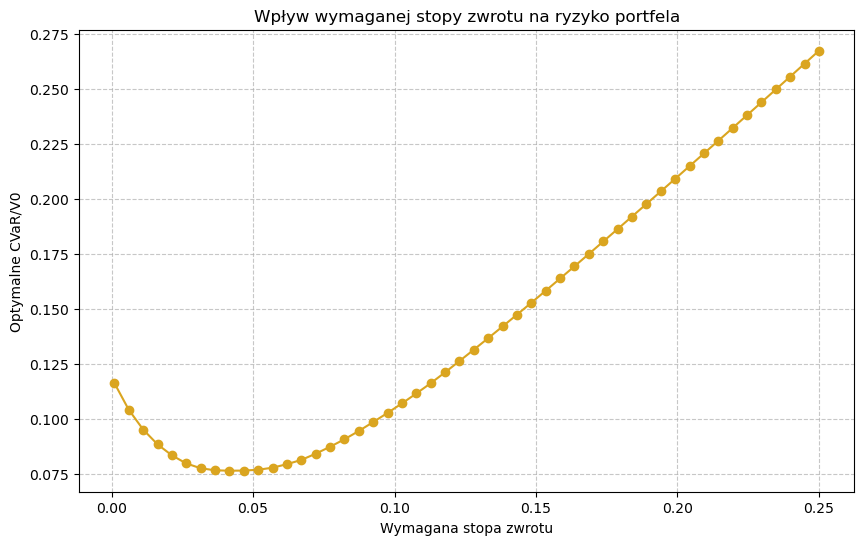

In [7]:
res = return_rate_influence(T_0=T_0,
                            T_f=T_f,
                            max_iter=max_iter,
                            step_size=step_size,
                            annealing_rate=annealing_rate,
                            probabilities=probabilities,
                            alpha=alpha,
                            S_0=S_0,
                            S_T=scenarios,
                            V_0=V_0,
                            return_rates=np.linspace(0.001, 0.25, 50))
plot_return_rate_influence(res, relative=True, V_0=V_0)